__IMPORT DULU KING SEBELUM KENA TARIFF__

In [271]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

__FORWARD MODELING (MODEL --> DATA)__

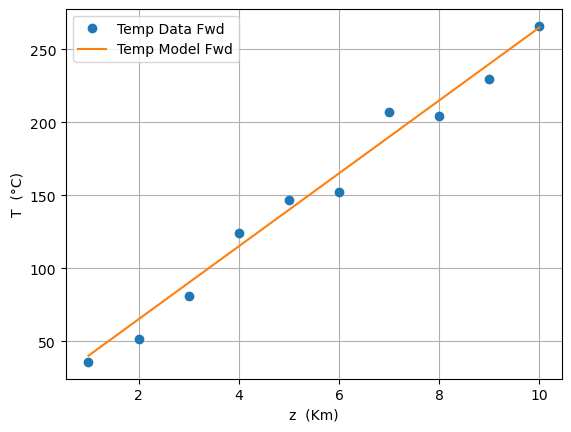

model awal a dan b           :  15 dan 25
misfit dari forward modeling :  718.5766158335374


In [309]:
#Parameter Model
a = 15
b = 25

#Variasi Kedalaman
z = np.arange(1,11)

#Temp model sintetik
T = a+(b*z)

#Temp sintetik (include noise)
e = np.random.default_rng(seed=7)   #random number gen
noise = e.uniform(-17,17, len(T))   #generate noise
T_data = np.subtract(T,noise)

#Plot Kurva
plt.plot(z,T_data, "o", label="Temp Data Fwd")
plt.plot(z,T, label="Temp Model Fwd")
plt.legend()
plt.grid(True)
plt.xlabel("z  (Km)")
plt.ylabel("T  (°C)")
plt.show()

misfit_fwd = np.sum(T_data-T)**2
print("model awal a dan b           : ", a, "dan", b)
print("misfit dari forward modeling : ", misfit_fwd)

__SPILL DATA HASIL FORMOD__

Forward model dengan inputan model a dan b menghasilkan data temperatur dengan variasi kedalaman (T=a+b.z), untuk melanjutkan proses dilakukan penambahan efek noise sehingga --> (T=a+b.z)-noise.

In [273]:
#Rapi-rapi dulu king
df = {"z":z, "T Formod (noise)":T_data}
df_il=pd.DataFrame(df)
df_il

,z,T Formod (noise)
0,1,35.746754
1,2,51.494731
2,3,80.626687
3,4,124.342956
4,5,146.794346
5,6,152.299183
6,7,206.820980
7,8,204.078234
8,9,229.899639
9,10,266.090212


__INVERSE MODELING__

Inversi dilakukan terhadap data hasil forward modeling yang sudah ditambahkan efek noise untuk mendapatkan model a dan b (hasil inversi).

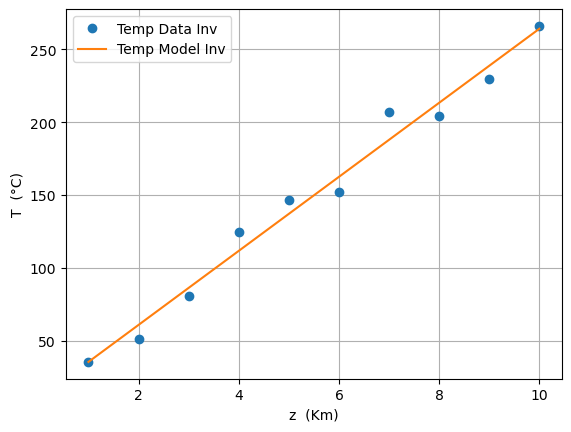

Model a dan b hasil inversi :  [10.08196796 25.40680074]
misfit invers modeling      :  [1003.03197143]


In [306]:
#Fungsi Inversi Linear (d=g(m))
d = np.array(df_il["T Formod (noise)"])
g = np.column_stack((np.ones_like(z), z))

#Inversi Least Square Method
m_est, misfit_inv, rank, s = np.linalg.lstsq(g, d, rcond=None)
a_inv, b_inv = m_est    #Bertemu Model (a dan b)
T_inv = a_inv+(b_inv*z)

#Plotking
plt.plot(z, d, "o", label="Temp Data Inv")
plt.plot(z, T_inv, label="Temp Model Inv")
plt.grid()
plt.legend()
plt.xlabel("z  (Km)")
plt.ylabel("T  (°C)")
plt.show()
print("Model a dan b hasil inversi : ", m_est)
print("misfit invers modeling      : ", misfit_inv)

__PERBANDINGAN KURVA FORWARD DAN INVERS MODELING__

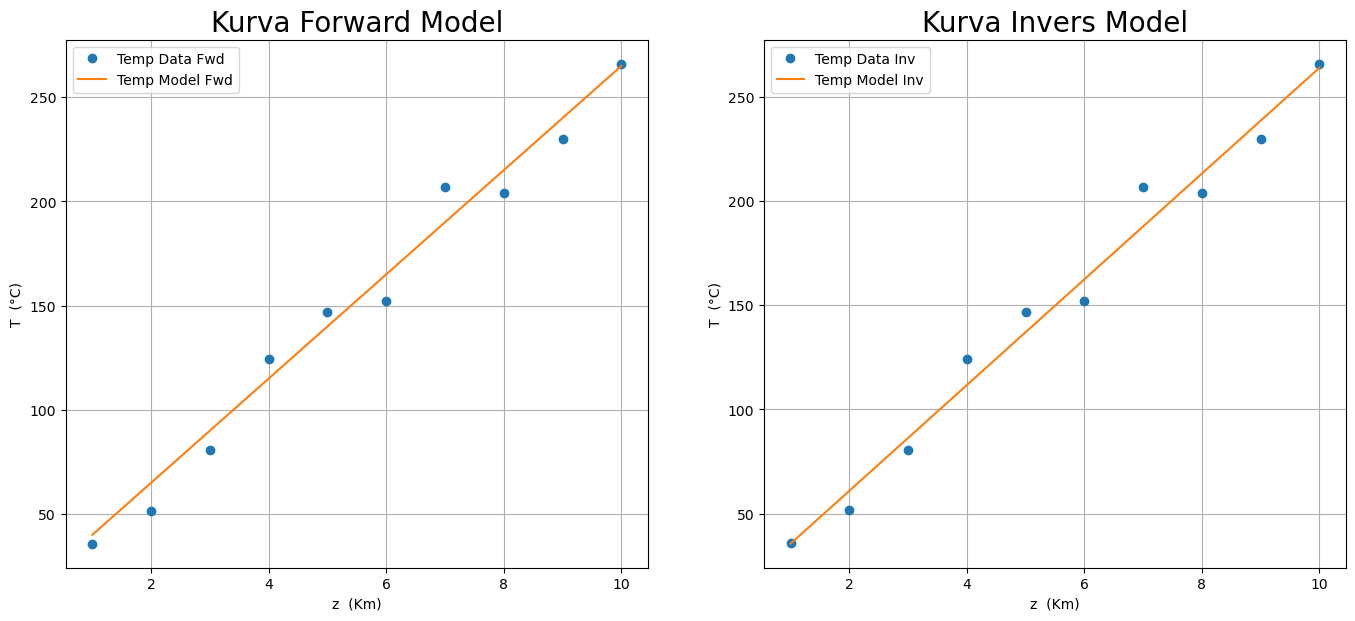

In [308]:
#platketeplatketePLOT
plt.subplot(121)
plt.plot(z,T_data, "o", label="Temp Data Fwd")
plt.plot(z,T, label="Temp Model Fwd")
plt.title("Kurva Forward Model", fontsize=20)
plt.legend()
plt.grid(True)
plt.xlabel("z  (Km)")
plt.ylabel("T  (°C)")

plt.subplot(122)
plt.plot(z, d, "o", label="Temp Data Inv")
plt.plot(z, T_inv, label="Temp Model Inv")
plt.title("Kurva Invers Model", fontsize=20)
plt.legend()
plt.grid(True)
plt.xlabel("z  (Km)")
plt.ylabel("T  (°C)")

plt.subplots_adjust(left=0.0,bottom=0.0,right=2.0,top=1.1,wspace=0.2); plt.show()

__JANGAN LUPA MENJADI SENIMAN__
